<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/customer_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [ ]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

In [ ]:
df = pd.read_csv('/content/MutualFunds.csv', encoding="ISO-8859-1")

In [ ]:
df.head(10)

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAAIX,MutualFund,US,American Century Strategic Allo,American Century Strategic Allocation: Aggress...,USD,5000000.0,50.0,Allocation--70% to 85% Equity,American Century Investments,...,4.16,6.70,9.01,4.74,9.43,10.84,6.82,3.91,7.15,9.10
6,AAAJX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AAAKX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AAALX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,NaN,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AAAMX,MutualFund,US,NaN,American Century One Choice Blend+ 2020 Portfo...,USD,2500.0,NaN,Target-Date 2020,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 298 entries, fund_symbol to peer_governance_max
dtypes: float64(277), object(21)
memory usage: 8.2+ MB


In [ ]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
initial_investment,2955.0,3.409262e+06,5.307626e+07,100.00000,1.000000e+03,2.500000e+03,5.000000e+05,2.500000e+09
subsequent_investment,1730.0,1.006329e+03,9.607292e+03,25.00000,5.000000e+01,5.000000e+01,1.000000e+02,2.000000e+05
total_net_assets,3583.0,5.609225e+09,2.258044e+10,10.00000,1.563188e+08,6.823389e+08,2.502946e+09,2.784640e+11
year_to_date_return,3497.0,9.225500e-02,7.834340e-02,-0.19861,2.660000e-02,8.560000e-02,1.496000e-01,4.987000e-01
day50_moving_average,3591.0,2.344290e+01,4.650191e+01,3.08500,1.080200e+01,1.485900e+01,2.379450e+01,2.018338e+03
...,...,...,...,...,...,...,...,...
peer_social_max,2199.0,1.145881e+01,1.730553e+00,5.86000,1.094000e+01,1.168000e+01,1.204000e+01,1.508000e+01
governance_score,2284.0,6.181370e+00,2.837326e+00,0.00000,6.180000e+00,7.340000e+00,7.760000e+00,1.117000e+01
peer_governance_min,2199.0,5.289327e+00,6.478769e-01,2.61000,5.040000e+00,5.270000e+00,5.790000e+00,7.330000e+00
peer_governance_avg,2199.0,7.226826e+00,7.896222e-01,3.04000,6.930000e+00,7.430000e+00,7.540000e+00,1.001000e+01


In [ ]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
fund_symbol,3592,3592,CUVRX,1
quote_type,3592,1,MutualFund,3592
region,3592,1,US,3592
fund_short_name,3465,1610,American Century International,22
fund_long_name,3592,3592,Columbia Quality Income Fund Advisor Class,1
currency,3592,1,USD,3592
fund_category,3472,103,Large Growth,215
fund_family,3592,229,American Century Investments,459
exchange_code,3591,1,NAS,3591
exchange_name,3591,1,Nasdaq,3591


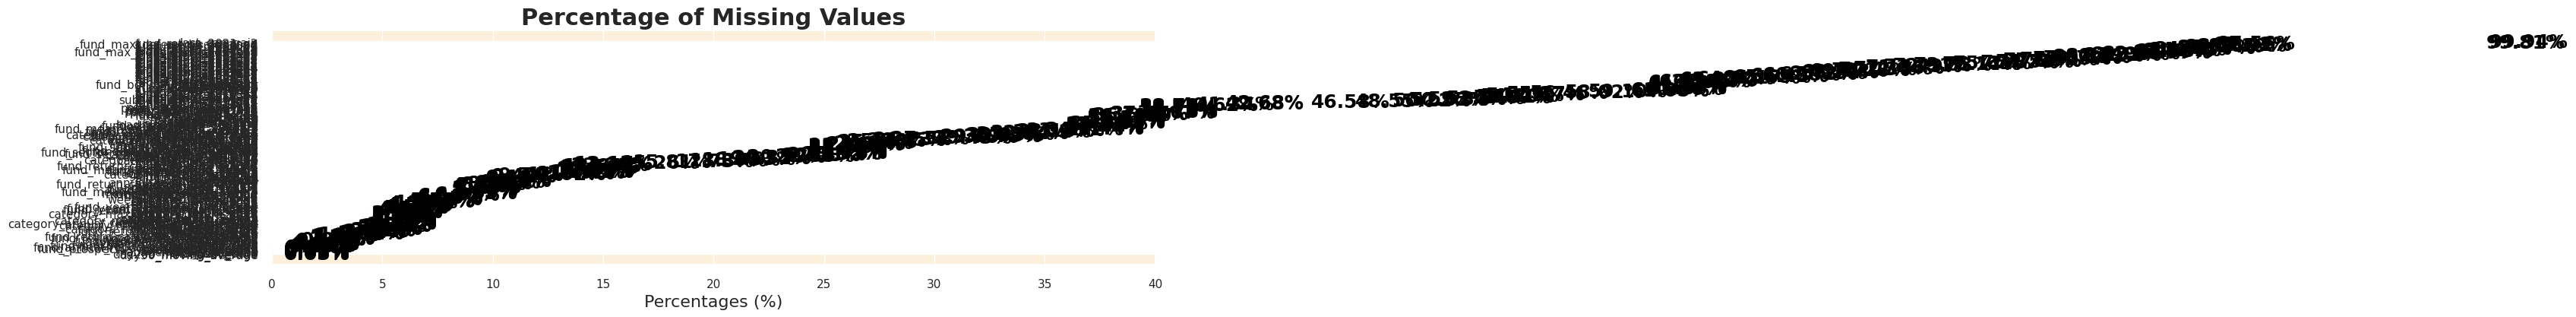

In [ ]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [ ]:
# Extracting rows with missing values in 'initial_investment' or 'fund_symbol' columns
df[df['initial_investment'].isnull() | df['fund_symbol'].isnull()].head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
8,AAALX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,NaN,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,AAAQX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class R,USD,NaN,NaN,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
17,AAAUX,MutualFund,US,American Century Strategic Allo,American Century Strategic Allocation: Aggress...,USD,NaN,NaN,Allocation--70% to 85% Equity,American Century Investments,...,4.16,6.70,9.01,4.74,9.43,10.84,6.82,3.91,7.15,9.10
18,AAAVX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class R6,USD,NaN,NaN,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
21,AABAX,MutualFund,US,Cavanal Hill Active Core Fd Cl,Cavanal Hill Active Core Fund Class A,USD,NaN,NaN,Allocation--50% to 70% Equity,Cavanal Hill funds,...,4.11,6.45,9.77,6.86,10.03,11.68,7.33,5.07,7.43,9.59


In [ ]:
# Removing rows with missing values in 'initial_investment' and 'fund_symbol' columns
df = df.dropna(subset=['initial_investment', 'fund_symbol'])

In [ ]:
# Verify the removal of missing values
df.isnull().sum().sum()

np.int64(262204)

In [ ]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
# The column name 'quote_type\t' has been corrected to 'quote_type'
duplicate_rows_sorted = duplicate_rows.sort_values(by=['region', 'quote_type', 'fund_symbol', 'initial_investment', 'currency'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max


In [ ]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 0 duplicate rows that need to be removed.


In [ ]:
# Getting the number of rows in the dataframe
df.shape[0]

2955

In [ ]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['region'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('initial_investment', axis=1)

,subsequent_investment,total_net_assets,year_to_date_return,day50_moving_average,day200_moving_average,week52_high_low_change,week52_high_low_change_perc,week52_high,week52_high_change,week52_high_change_perc,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 0.00%


In [ ]:
# Finding the number of unique fund symbols
unique_fund_symbols = df['fund_symbol'].nunique()

# Printing the number of unique fund symbols
print(f"The number of unique fund symbols in the dataset is: {unique_fund_symbols}")

The number of unique fund symbols in the dataset is: 2955


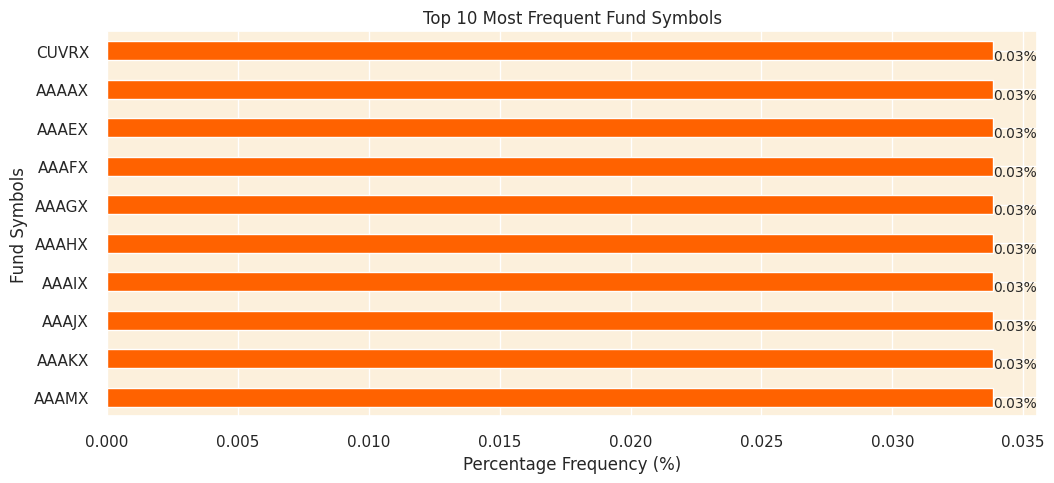

In [ ]:
# Finding the top 10 most frequent fund symbols instead of StockCode
top_10_fund_symbols = df['fund_symbol'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent fund symbols
plt.figure(figsize=(12, 5))
top_10_fund_symbols.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_fund_symbols):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Fund Symbols') # Changed title
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Fund Symbols') # Changed ylabel
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Finding the number of numeric characters in each unique stock code
# Assuming 'fund_symbol' is the relevant column
unique_fund_symbols = df['fund_symbol'].unique()  # Changed 'StockCode' to 'fund_symbol'
numeric_char_counts_in_unique_codes = pd.Series(unique_fund_symbols).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique fund symbols:") # Changed to 'fund symbols'
print("-"*70)
print(numeric_char_counts_in_unique_codes)


Value counts of numeric character frequencies in unique fund symbols:
----------------------------------------------------------------------
0    2955
Name: count, dtype: int64


In [ ]:
# Finding the number of numeric characters in each unique stock code
# Assuming 'fund_symbol' is the relevant column
unique_fund_symbols = df['fund_symbol'].unique()  # Changed 'StockCode' to 'fund_symbol'
numeric_char_counts_in_unique_codes = pd.Series(unique_fund_symbols).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique fund symbols:") # Changed to 'fund symbols'
print("-"*70)
print(numeric_char_counts_in_unique_codes)

# Finding and printing the stock codes with 0 and 1 numeric characters
# Changed 'unique_fund_symbol' to 'unique_fund_symbols' to use the correctly defined variable
anomalous_fund_symbol = [code for code in unique_fund_symbols if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous fund_symbol:")
print("-"*22)
for code in anomalous_fund_symbol:
    print(code)

Value counts of numeric character frequencies in unique fund symbols:
----------------------------------------------------------------------
0    2955
Name: count, dtype: int64
Anomalous fund_symbol:
----------------------
AAAAX
AAAEX
AAAFX
AAAGX
AAAHX
AAAIX
AAAJX
AAAKX
AAAMX
AAANX
AAAOX
AAAPX
AAARX
AAASX
AAATX
AAAWX
AAAZX
AABEX
AABFX
AABGX
AABJX
AABKX
AABPX
AABQX
AABRX
AABTX
AABWX
AABYX
AABZX
AACCX
AACFX
AACHX
AACIX
AACKX
AACLX
AACMX
AACPX
AACRX
AACSX
AACTX
AACUX
AACVX
AACWX
AADAX
AADBX
AADCX
AADEX
AADGX
AADHX
AADIX
AADJX
AADNX
AADPX
AADRX
AADTX
AADVX
AADYX
AAECX
AAEFX
AAEGX
AAEHX
AAEIX
AAEKX
AAELX
AAEMX
AAEOX
AAESX
AAETX
AAEUX
AAEWX
AAFTX
AAGPX
AAHMX
AAHTX
AAIEX
AAIIX
AAINX
AAIPX
AAISX
AALTX
AAMAX
AAMBX
AAMCX
AAMIX
AAMTX
AANTX
AAOTX
AASCX
AASMX
AASSX
AATIX
AATSX
AAUTX
AAZAX
AAZCX
ABAEX
ABALX
ABASX
ABCAX
ABCCX
ABCEX
ABCIX
ABCSX
ABCVX
ABCYX
ABDAX
ABECX
ABEIX
ABEMX
ABESX
ABEYX
ABFAX
ABHFX
ABHIX
ABHTX
ABHYX
ABIAX
ABICX
ABIEX
ABINX
ABIZX
ABLSX
ABLYX
ABMAX
ABMIX
ABNAX
ABNCX
ABNDX
ABNFX
ABN

In [ ]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['fund_symbol'].isin(anomalous_fund_symbol).sum() / len(df)) * 100 # Changed 'StockCode' to 'fund_symbol' and 'anomalous_stock_codes' to 'anomalous_fund_symbol'

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 100.00%


In [ ]:
# Removing rows with anomalous stock codes from the datasets
df = df[~df['fund_symbol'].isin(anomalous_fund_symbol)]

In [ ]:
# Getting the number of rows inthe dataframe
df.shape[0]

0

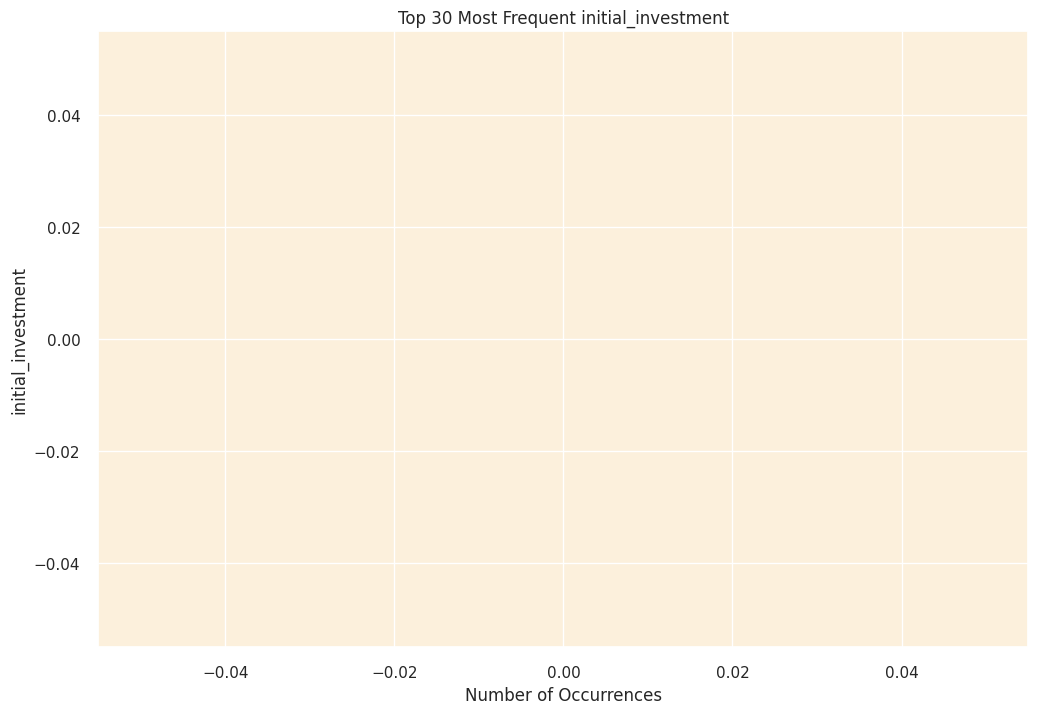

In [ ]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['initial_investment'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('initial_investment')
plt.title('Top 30 Most Frequent initial_investment')

# Show the plot
plt.show()

In [ ]:
# Find unique descriptions containing lowercase characters
lowercase_initial_investment = df['initial_investment'].unique()
lowercase_initial_investment = [desc for desc in lowercase_initial_investment if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_initial_investment: # Changed 'initial_investment' to 'lowercase_initial_investment'
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------


In [ ]:
# Getting the number of rows in the dataframe
df.shape[0]

0

In [ ]:
df['region'].describe()

,region
count,0
unique,0
top,NaN
freq,NaN


In [ ]:
df[df['region']==0].describe()[['initial_investment']]

,initial_investment
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['region'] > 0]

In [ ]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [ ]:
# Getting the number of rows in the dataframe
df.shape[0]

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22149 entries, 0 to 22148
Columns: 298 entries, fund_symbol to peer_governance_max
dtypes: float64(277), object(21)
memory usage: 50.4+ MB


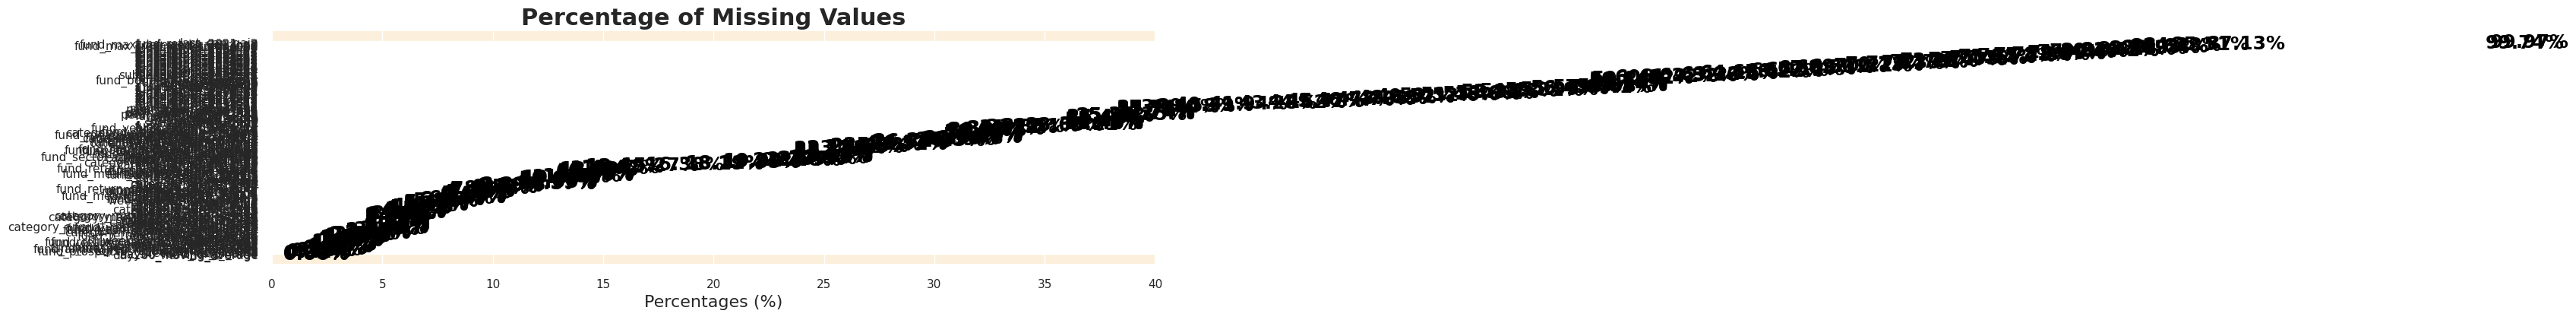

The dataset contains 0 duplicate rows that need to be removed.
The percentage of cancelled transactions in the dataset is: 0.00%
The number of unique fund symbols in the dataset is: 15168


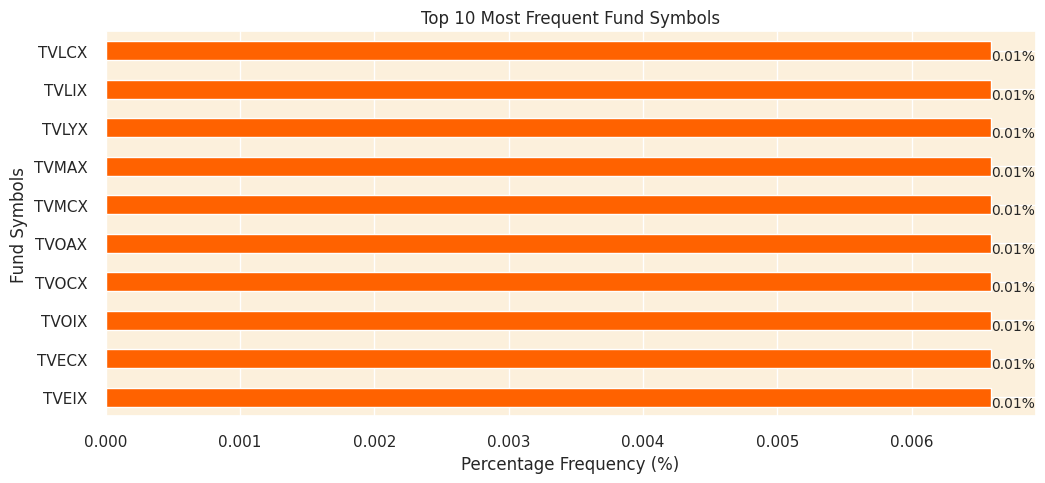

Value counts of numeric character frequencies in unique fund symbols:
----------------------------------------------------------------------
0    15168
Name: count, dtype: int64
Value counts of numeric character frequencies in unique fund symbols:
----------------------------------------------------------------------
0    15168
Name: count, dtype: int64
Anomalous fund_symbol:
----------------------
AAAAX
AAAEX
AAAFX
AAAGX
AAAHX
AAAIX
AAAJX
AAAKX
AAAMX
AAANX
AAAOX
AAAPX
AAARX
AAASX
AAATX
AAAWX
AAAZX
AABEX
AABFX
AABGX
AABJX
AABKX
AABPX
AABQX
AABRX
AABTX
AABWX
AABYX
AABZX
AACCX
AACFX
AACHX
AACIX
AACKX
AACLX
AACMX
AACPX
AACRX
AACSX
AACTX
AACUX
AACVX
AACWX
AADAX
AADBX
AADCX
AADEX
AADGX
AADHX
AADIX
AADJX
AADNX
AADPX
AADRX
AADTX
AADVX
AADYX
AAECX
AAEFX
AAEGX
AAEHX
AAEIX
AAEKX
AAELX
AAEMX
AAEOX
AAESX
AAETX
AAEUX
AAEWX
AAFTX
AAGPX
AAHMX
AAHTX
AAIEX
AAIIX
AAINX
AAIPX
AAISX
AALTX
AAMAX
AAMBX
AAMCX
AAMIX
AAMTX
AANTX
AAOTX
AASCX
AASMX
AASSX
AATIX
AATSX
AAUTX
AAZAX
AAZCX
ABAEX
ABALX
ABASX
ABCAX
ABCC

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline
# %%
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# %%
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')
# %%
df = pd.read_csv('/content/MutualFunds.csv', encoding="ISO-8859-1")
# %%
df.head(10)
# %%
df.info()
# %%
# Summary statistics for numerical variables
df.describe().T
# %%
# Summary statistics for categorical variables
df.describe(include='object').T
# %%
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()
# %%
# Extracting rows with missing values in 'initial_investment' or 'fund_symbol' columns
df[df['initial_investment'].isnull() | df['fund_symbol'].isnull()].head()
# %%
# Removing rows with missing values in 'initial_investment' and 'fund_symbol' columns
df = df.dropna(subset=['initial_investment', 'fund_symbol'])
# %%
# Verify the removal of missing values
df.isnull().sum().sum()
# %%
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
# The column name 'quote_type\t' has been corrected to 'quote_type'
duplicate_rows_sorted = duplicate_rows.sort_values(by=['region', 'quote_type', 'fund_symbol', 'initial_investment', 'currency'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)
# %%
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)
# %%
# Getting the number of rows in the dataframe
df.shape[0]
# %%
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['region'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('initial_investment', axis=1)
# %%
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")
# %%
# Finding the number of unique fund symbols
unique_fund_symbols = df['fund_symbol'].nunique()

# Printing the number of unique fund symbols
print(f"The number of unique fund symbols in the dataset is: {unique_fund_symbols}")
# %%
# Finding the top 10 most frequent fund symbols instead of StockCode
top_10_fund_symbols = df['fund_symbol'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent fund symbols
plt.figure(figsize=(12, 5))
top_10_fund_symbols.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_fund_symbols):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Fund Symbols') # Changed title
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Fund Symbols') # Changed ylabel
plt.gca().invert_yaxis()
plt.show()
# %%
# Finding the number of numeric characters in each unique stock code
# Assuming 'fund_symbol' is the relevant column
unique_fund_symbols = df['fund_symbol'].unique()  # Changed 'StockCode' to 'fund_symbol'
numeric_char_counts_in_unique_codes = pd.Series(unique_fund_symbols).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique fund symbols:") # Changed to 'fund symbols'
print("-"*70)
print(numeric_char_counts_in_unique_codes)

# %%
# Finding the number of numeric characters in each unique stock code
# Assuming 'fund_symbol' is the relevant column
unique_fund_symbols = df['fund_symbol'].unique()  # Changed 'StockCode' to 'fund_symbol'
numeric_char_counts_in_unique_codes = pd.Series(unique_fund_symbols).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique fund symbols:") # Changed to 'fund symbols'
print("-"*70)
print(numeric_char_counts_in_unique_codes)

# Finding and printing the stock codes with 0 and 1 numeric characters
# Changed 'unique_fund_symbol' to 'unique_fund_symbols' to use the correctly defined variable
anomalous_fund_symbol = [code for code in unique_fund_symbols if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous fund_symbol:")
print("-"*22)
for code in anomalous_fund_symbol:
    print(code)
# %%
# Calculating the

In [ ]:
df.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max,Transaction_Status
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11,Completed
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30,Completed
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Completed
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90,Completed
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Completed


In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('fund_symbol')['fund_short_name'].nunique().reset_index()
total_transactions.rename(columns={'fund_short_name': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('fund_symbol')['currency'].sum().reset_index()
#total_products_purchased.rename(columns={'fund_long_name': 'currency'}, inplace=True) # Removing unnecessary rename as 'currency' is already the column name

# Initialize customer_data with total_transactions DataFrame
customer_data = total_transactions  # Initialize customer_data with total_transactions

# Merge total_products_purchased into customer_data
customer_data = pd.merge(customer_data, total_products_purchased, on='fund_symbol')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Total_Transactions,currency
0,AAAAX,1,USD
1,AAAEX,1,USD
2,AAAFX,0,USD
3,AAAGX,1,USD
4,AAAHX,0,USD


In [ ]:
# Convert 'initial_investment' and 'region' columns to numeric type
df['initial_investment'] = pd.to_numeric(df['initial_investment'], errors='coerce')
df['region'] = pd.to_numeric(df['region'], errors='coerce')

# Calculate the total spend by each customer
df['Total_Spend'] = df['initial_investment'] * df['region']

In [ ]:
# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Total_Transactions,currency
0,AAAAX,1,USD
1,AAAEX,1,USD
2,AAAFX,0,USD
3,AAAGX,1,USD
4,AAAHX,0,USD


In [ ]:
# Convert 'week52_high_change' to datetime if it's not already
df['week52_high_change'] = pd.to_datetime(df['week52_high_change'], errors='coerce')

# Extract day of week and hour from fund_symbol
df['Day_Of_Week'] = df['week52_high_change'].dt.dayofweek
df['Hour'] = df['week52_high_change'].dt.hour

# ... (rest of your code)
# Extract day of week and hour from fund_symbol
df['Day_Of_Week'] = df['week52_high_change'].dt.dayofweek
df['Hour'] = df['week52_high_change'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('currency')['week52_high_change'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('currency').mean().reset_index()
average_days_between_purchases.rename(columns={'week52_high_change': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['currency', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('currency')['Count'].idxmax()][['currency', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['currency', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('currency')['Count'].idxmax()][['currency', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='currency')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='currency')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='currency')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Total_Transactions,currency,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,AAAAX,1,USD,-0.227303,3.0,0.0
1,AAAEX,1,USD,-0.227303,3.0,0.0
2,AAAFX,0,USD,-0.227303,3.0,0.0
3,AAAGX,1,USD,-0.227303,3.0,0.0
4,AAAHX,0,USD,-0.227303,3.0,0.0


In [ ]:
df['region'].value_counts(normalize=True).head()

,proportion
region,


In [ ]:
# Import necessary libraries
import pandas as pd

# Assuming your data is in 'MutualFunds.csv'
df = pd.read_csv('/content/MutualFunds.csv', encoding="ISO-8859-1")

# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_region = df.groupby(['fund_symbol', 'region']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_region.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('fund_symbol') # Changed customer_country to customer_region

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_US'] = customer_main_country['region'].apply(lambda x: 1 if x == 'US' else 0)

# Instead of initializing customer_data as empty, assign customer_main_country[['fund_symbol', 'Is_US']] to it
customer_data = customer_main_country[['fund_symbol', 'Is_US']].copy() # Assign the desired columns to customer_data

# Now you can proceed with other merges if needed
# ... (rest of your code)

# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Is_US
23782,ZVNIX,1
0,AAAAX,1
1,AAAEX,1
2,AAAFX,1
3,AAAGX,1


In [ ]:
# Display feature distribution
customer_data['Is_US'].value_counts()

,count
Is_US,
1,23783


In [ ]:
# Calculate the total number of transactions made by each customer
# Replace 'InvoiceNo' with the correct column name, which is likely a unique identifier for each transaction.
# Assuming 'fund_long_name' uniquely identifies transactions within your dataset:
total_transactions = df.groupby('fund_symbol')['fund_long_name'].nunique().reset_index()

# Create the 'Transaction_Status' column if it doesn't exist
if 'Transaction_Status' not in df.columns:
    df['Transaction_Status'] = np.where(df['region'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('fund_symbol')['fund_long_name'].nunique().reset_index()
cancellation_frequency.rename(columns={'fund_long_name': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='fund_symbol', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['fund_long_name']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Is_US,Cancellation_Frequency,Cancellation_Rate
0,ZVNIX,1,0.0,0.0
1,AAAAX,1,0.0,0.0
2,AAAEX,1,0.0,0.0
3,AAAFX,1,0.0,0.0
4,AAAGX,1,0.0,0.0


In [ ]:
df['region'].value_counts(normalize=True).head()

,proportion
region,
US,1.0


In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('fund_symbol')['week52_high_change'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
# Ensure 'Transaction_Status' column exists and has 'Cancelled' values
df['Transaction_Status'] = np.where(df['region'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

# Check if cancelled_transactions is empty before proceeding
if not cancelled_transactions.empty:
    cancellation_frequency = cancelled_transactions.groupby('fund_symbol')['week52_high_change'].nunique().reset_index()
    cancellation_frequency.rename(columns={'week52_high_change': 'Cancellation_Frequency'}, inplace=True)

    # Merge the Cancellation Frequency data into the customer_data dataframe
    customer_data = pd.merge(customer_data, cancellation_frequency, on='fund_symbol', how='left')

    # Replace NaN values with 0 (for customers who have not cancelled any transaction)
    customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

    # Calculate the Cancellation Rate
    customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['week52_high_change']
else:
    # Handle the case where there are no cancelled transactions
    customer_data['Cancellation_Frequency'] = 0  # Assign 0 for all customers
    customer_data['Cancellation_Rate'] = 0  # Assign 0 cancellation rate

# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Is_US,Cancellation_Frequency,Cancellation_Rate
0,ZVNIX,1,0,0
1,AAAAX,1,0,0
2,AAAEX,1,0,0
3,AAAFX,1,0,0
4,AAAGX,1,0,0


In [ ]:
# Convert 'initial_investment' and 'region' columns to numeric type, handling errors
df['initial_investment'] = pd.to_numeric(df['initial_investment'], errors='coerce')
df['region'] = pd.to_numeric(df['region'], errors='coerce')

# Calculate the total spend by each customer
df['Total_Spend'] = df['initial_investment'] * df['region']

In [ ]:
# Extract month and year from InvoiceDate
# Convert 'week52_high_change' to datetime if it's not already
df['week52_high_change'] = pd.to_datetime(df['week52_high_change'], errors='coerce')

df['Year'] = df['week52_high_change'].dt.year
df['Month'] = df['week52_high_change'].dt.month

# Ensure Total_Spend column exists before calculating monthly spending
# If it doesn't exist, create it by multiplying initial_investment and region
if 'Total_Spend' not in df.columns:
    df['Total_Spend'] = df['initial_investment'] * df['region']

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['fund_symbol', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('fund_symbol')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('fund_symbol')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='fund_symbol')
customer_data = pd.merge(customer_data, spending_trends, on='fund_symbol')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Is_US,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,ZVNIX,1,0,0,0.0,0.0,0
1,AAAAX,1,0,0,0.0,0.0,0
2,AAAEX,1,0,0,0.0,0.0,0
3,AAAFX,1,0,0,0.0,0.0,0
4,AAAGX,1,0,0,0.0,0.0,0


In [ ]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['fund_symbol'] = customer_data['fund_symbol'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [ ]:
customer_data.head(10)

,fund_symbol,Is_US,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,ZVNIX,1,0,0,0,0,0
1,AAAAX,1,0,0,0,0,0
2,AAAEX,1,0,0,0,0,0
3,AAAFX,1,0,0,0,0,0
4,AAAGX,1,0,0,0,0,0
5,AAAHX,1,0,0,0,0,0
6,AAAIX,1,0,0,0,0,0
7,WWSCX,1,0,0,0,0,0
8,WWSIX,1,0,0,0,0,0
9,WWSMX,1,0,0,0,0,0


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23421 entries, 0 to 23420
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fund_symbol             23421 non-null  string
 1   Is_US                   23421 non-null  Int64 
 2   Cancellation_Frequency  23421 non-null  Int64 
 3   Cancellation_Rate       23421 non-null  Int64 
 4   Monthly_Spending_Mean   23421 non-null  Int64 
 5   Monthly_Spending_Std    23421 non-null  Int64 
 6   Spending_Trend          23421 non-null  Int64 
dtypes: Int64(6), string(1)
memory usage: 1.4 MB


In [ ]:
# Extract month and year from InvoiceDate
# Convert 'week52_high_change' to datetime if it's not already
df['week52_high_change'] = pd.to_datetime(df['week52_high_change'], errors='coerce')

df['Year'] = df['week52_high_change'].dt.year
df['Month'] = df['week52_high_change'].dt.month

# Ensure Total_Spend column exists before calculating monthly spending
# If it doesn't exist, create it by multiplying initial_investment and region
if 'Total_Spend' not in df.columns:
    df['Total_Spend'] = df['initial_investment'] * df['region']

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['fund_symbol', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('fund_symbol')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('fund_symbol')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='fund_symbol')
customer_data = pd.merge(customer_data, spending_trends, on='fund_symbol')

# ----> Impute or remove NaT values before fitting the model <----
# Option 1: Impute with a specific value (e.g., 0)
# customer_data.fillna(0, inplace=True)

# Option 2: Remove rows with NaT values
# customer_data.dropna(inplace=True)

# Display the first few rows of the customer_data dataframe
customer_data.head()

,fund_symbol,Is_US,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean_x,Monthly_Spending_Std_x,Spending_Trend_x,Monthly_Spending_Mean_y,Monthly_Spending_Std_y,Spending_Trend_y
0,ZVNIX,1,0,0,0,0,0,0.0,0.0,0
1,AAAAX,1,0,0,0,0,0,0.0,0.0,0
2,AAAEX,1,0,0,0,0,0,0.0,0.0,0
3,AAAFX,1,0,0,0,0,0,0.0,0.0,0
4,AAAGX,1,0,0,0,0,0,0.0,0.0,0


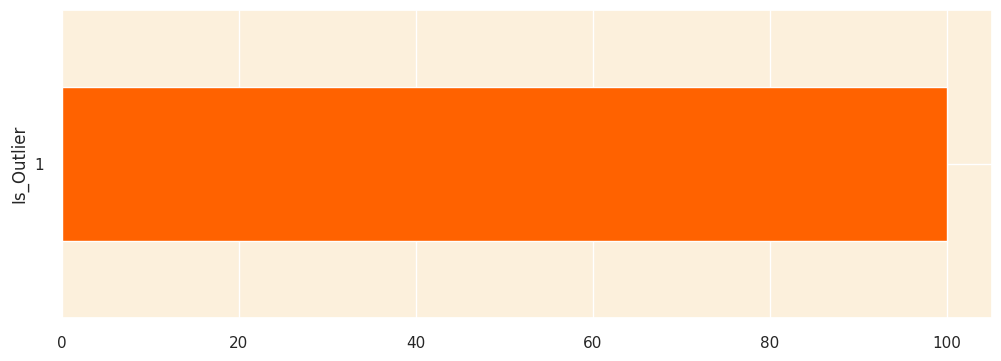

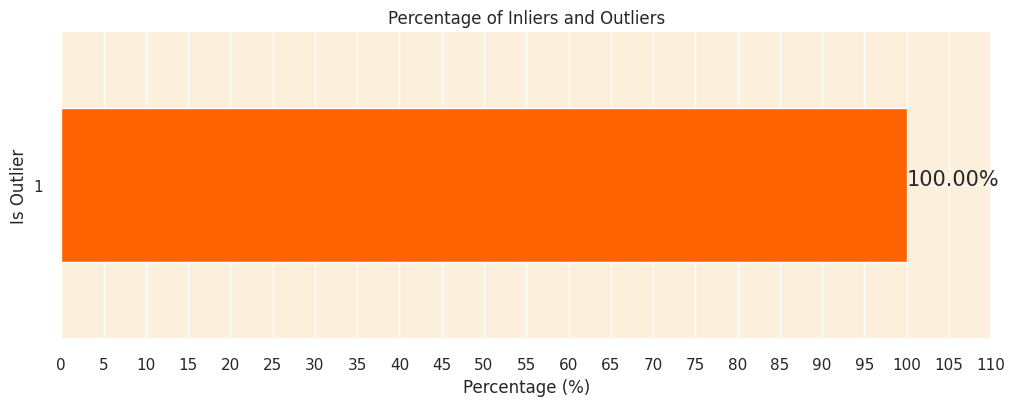

In [ ]:
# Isolation Forest for Outlier Detection

# Select numerical features for outlier detection
# Exclude 'fund_symbol' as it's not numerical
# Use 'Cancellation_Frequency' instead of 'Cancellation_Frequency_x' if that's the correct column name
numerical_features = ['Cancellation_Frequency', 'Cancellation_Rate']

# Create Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model and predict outliers using only numerical features
customer_data['Is_Outlier'] = isolation_forest.fit_predict(customer_data[numerical_features])

# Convert -1 (outlier) to 1 and 1 (inlier) to 0
customer_data['Is_Outlier'] = customer_data['Is_Outlier'].apply(lambda x: 1 if x == -1 else 0)

# Now you can calculate and plot the outlier percentage
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Is_Outlier' column (since 'Outlier_Scores' likely doesn't exist)
customer_data_cleaned = customer_data_cleaned.drop(columns=['Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

0

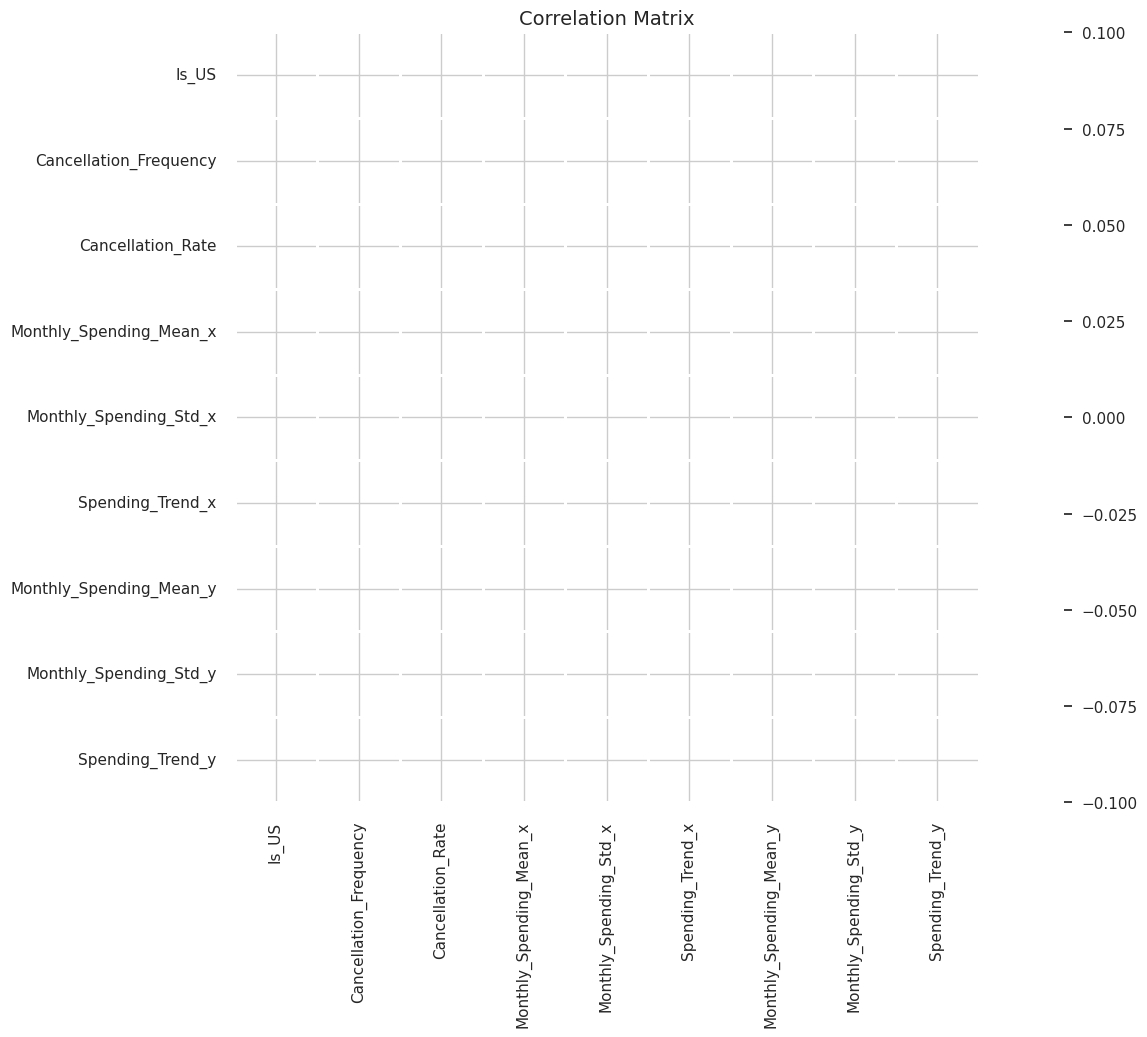

In [ ]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'fund_symbol' column
corr = customer_data_cleaned.drop(columns=['fund_symbol']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['fund_symbol', 'Is_US', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Check if the DataFrame is empty before scaling
if not customer_data_scaled.empty:
    # Applying the scaler to the necessary columns in the dataset
    customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])
else:
    print("DataFrame is empty. Cannot perform scaling.")  # Print a message to indicate the issue

# Display the first few rows of the scaled data (if not empty)
if not customer_data_scaled.empty:
    customer_data_scaled.head()

DataFrame is empty. Cannot perform scaling.
